<a href="https://colab.research.google.com/github/Lutfi0658/mp1-pas-2025/blob/main/Salinan_dari_mp1_pas_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# Konfigurasi dasar
img_height = 180
img_width = 180
batch_size = 32
epochs = 10

# Path ke dataset (ubah sesuai lokasi Anda)
dataset_path = '/content/drive/MyDrive/mp1/Vegetable Images'


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Ambil label kelas
class_names = train_ds.class_names
print("Classes:", class_names)


Found 5070 files belonging to 3 classes.
Using 4056 files for training.
Found 5070 files belonging to 3 classes.
Using 1014 files for validation.
Classes: ['test', 'train', 'validation']


In [ ]:
# Prefetch untuk optimasi pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Augmentasi gambar untuk pelatihan
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Multiclass
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

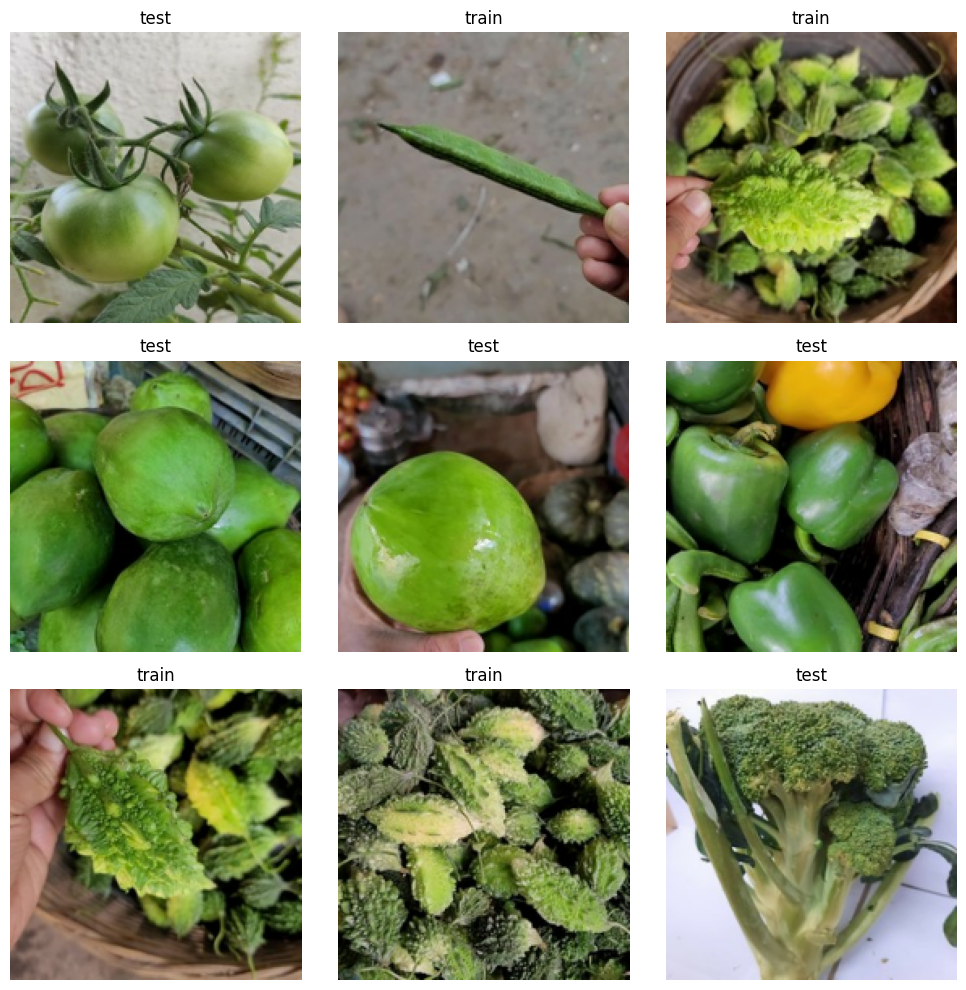

In [ ]:
import matplotlib.pyplot as plt

# Tampilkan 9 gambar pertama dari training set
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Ambil satu batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.5846 - loss: 0.7427 - val_accuracy: 0.7308 - val_loss: 0.5179
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.7225 - loss: 0.5349 - val_accuracy: 0.7692 - val_loss: 0.4755
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.7735 - loss: 0.4756 - val_accuracy: 0.7041 - val_loss: 0.5106
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.7810 - loss: 0.4729 - val_accuracy: 0.7870 - val_loss: 0.4532
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.8010 - loss: 0.4377 - val_accuracy: 0.7732 - val_loss: 0.4579
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.8139 - loss: 0.4173 - val_accuracy: 0.8393 - val_loss: 0.3932
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8196 - loss: 0.4039 - val_accuracy: 0.7978 - val_loss: 0.4329
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.8221 - loss: 0.4036 - val_accu